In [ ]:
#import dataset
from google.colab import drive
drive.mount('/content/drive')
#Loading the Dataset
import pandas as pd

path = '/content/drive/MyDrive/Random forest SVM Decision trees/data.txt'
df = pd.read_csv(path,sep=',')
df.columns = ['0', '1', '2', '3', '4','5','6','7','8','9','10','11','12','13','target_class']
df.head()

Mounted at /content/drive


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target_class
0,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
1,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
2,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
3,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
4,4321.03,4004.62,4284.10,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74,0


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X=df[df.columns[0:14]].values # Features
y = df['target_class'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # 90% training and 10% test
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (13481, 14)
X_test (1498, 14)
y_train (13481,)
y_test (1498,)


In [ ]:
df['mean']=df.mean(axis=1)
df['min'] = df.min(axis=1)
df['max']=df.max(axis=1)
df['stddev']=df.std(axis=1)
df['skew']=df.skew(axis=1)
df['kurtosis']=df.kurtosis(axis=1)

In [ ]:
inputs_n=df.drop(['0', '1', '2', '3', '4','5','6','7','8','9','10','11','12','13'],axis='columns')

In [ ]:
feature_cols = ['mean', 'min', 'max', 'stddev','kurtosis','skew']
X = inputs_n[feature_cols] # Features
y = df['target_class'] # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # 90% training and 10% test
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (13481, 6)
X_test (1498, 6)
y_train (13481,)
y_test (1498,)


In [ ]:
import tensorflow as tf
model=tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(256, activation=tf.nn.sigmoid),#HiddenLayer
                               tf.keras.layers.Dense(2, activation=tf.nn.softmax)   
])

In [ ]:
model.compile(optimizer='rmsprop',loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
422/422 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.5333 - val_loss: 0.7390 - val_accuracy: 0.5567
Epoch 2/30
422/422 [==============================] - 1s 1ms/step - loss: 0.6941 - accuracy: 0.5324 - val_loss: 0.7186 - val_accuracy: 0.5567
Epoch 3/30
422/422 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.5287 - val_loss: 0.6869 - val_accuracy: 0.5567
Epoch 4/30
422/422 [==============================] - 1s 1ms/step - loss: 0.6944 - accuracy: 0.5344 - val_loss: 0.7276 - val_accuracy: 0.5567
Epoch 5/30
422/422 [==============================] - 1s 1ms/step - loss: 0.6941 - accuracy: 0.5368 - val_loss: 0.6929 - val_accuracy: 0.5567
Epoch 6/30
422/422 [==============================] - 1s 1ms/step - loss: 0.6947 - accuracy: 0.5319 - val_loss: 0.7206 - val_accuracy: 0.5567
Epoch 7/30
422/422 [==============================] - 1s 1ms/step - loss: 0.6941 - accuracy: 0.5315 - val_loss: 0.6989 - val_accuracy: 0.5567
Epoch 

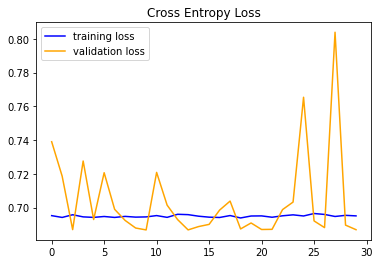

In [ ]:
import matplotlib.pyplot as plt
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend(['training loss','validation loss'])

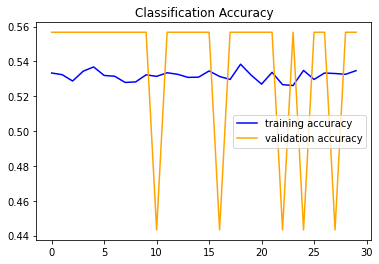

In [ ]:
import matplotlib.pyplot as plt
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend(['training accuracy','validation accuracy'])